In [49]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, random_state=0)

### 使用SKLearn库中的KNN算法

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

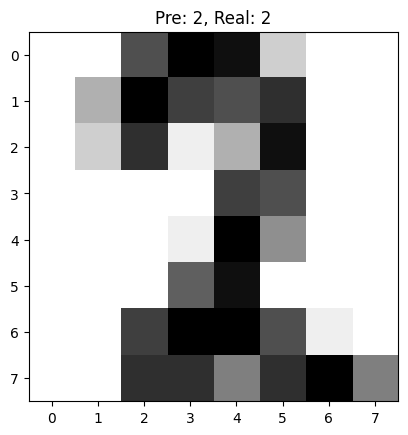

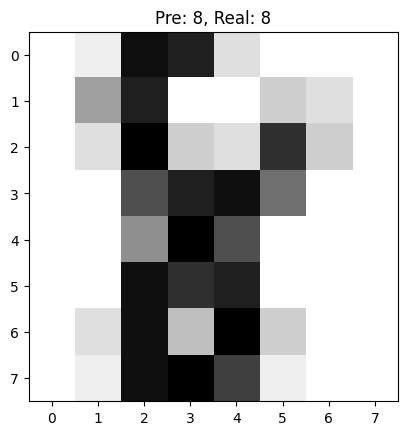

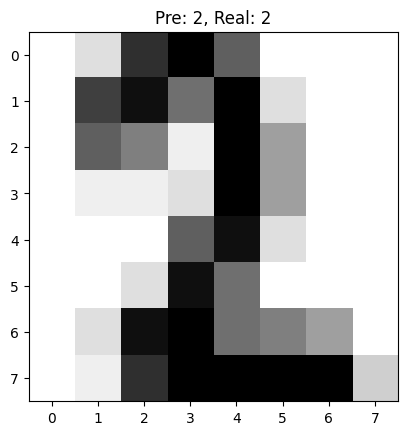

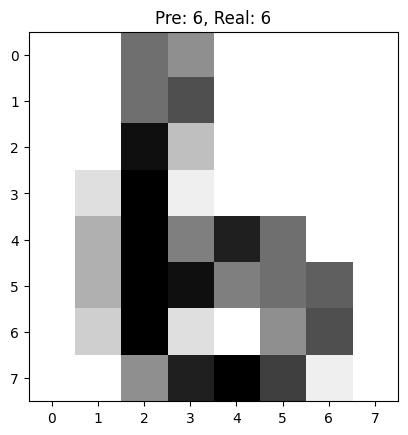

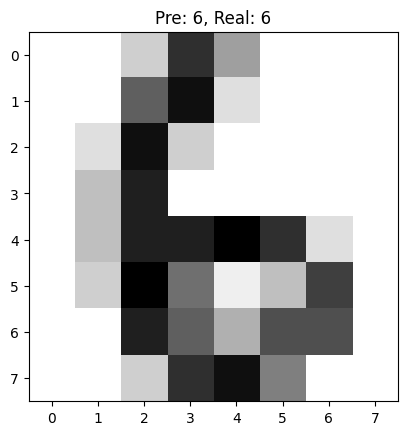

Accuracy: 0.978865406006674


In [58]:
y_pred = knn.predict(X_test)
# 显示前5个测试样本及其预测结果
for i in range(5):
    image = X_test[i].reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(f"Pre: {y_pred[i]}, Real: {y_test[i]}")
    plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

### 自定义实现KNN

实现欧式距离函数

In [53]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

实现KNN预测函数

In [54]:
from cProfile import label


def knn_predict(X_train, y_train, x_test, k):
    # 计算距离
    distances = [(euclidean_distance(x, x_test),y_train[i]) for i,x in enumerate(X_train)]
    # 对距离排序
    distances.sort(key=lambda x: x[0])
    # 取前 k 个
    k_nearest_distances = distances[:k]
    # 前 k 个的投票决策
    k_nearest_labels = [label for _,label in k_nearest_distances]
    from collections import Counter
    vote = Counter(k_nearest_labels)
    return vote.most_common(1)[0][0]

开始预测

In [55]:
k = 3  # 选择 K 值
y_pred = []
for i,x in enumerate(X_test):
    label = knn_predict(X_train, y_train, x, k)
    # 保存预测结果：（预测值，真实值）
    y_pred.append((label,y_test[i]))
y_pred

[(np.int64(2), np.int64(2)),
 (np.int64(8), np.int64(8)),
 (np.int64(2), np.int64(2)),
 (np.int64(6), np.int64(6)),
 (np.int64(6), np.int64(6)),
 (np.int64(7), np.int64(7)),
 (np.int64(1), np.int64(1)),
 (np.int64(9), np.int64(9)),
 (np.int64(8), np.int64(8)),
 (np.int64(5), np.int64(5)),
 (np.int64(2), np.int64(2)),
 (np.int64(8), np.int64(8)),
 (np.int64(6), np.int64(6)),
 (np.int64(6), np.int64(6)),
 (np.int64(6), np.int64(6)),
 (np.int64(6), np.int64(6)),
 (np.int64(1), np.int64(1)),
 (np.int64(0), np.int64(0)),
 (np.int64(5), np.int64(5)),
 (np.int64(8), np.int64(8)),
 (np.int64(8), np.int64(8)),
 (np.int64(7), np.int64(7)),
 (np.int64(8), np.int64(8)),
 (np.int64(4), np.int64(4)),
 (np.int64(7), np.int64(7)),
 (np.int64(5), np.int64(5)),
 (np.int64(4), np.int64(4)),
 (np.int64(9), np.int64(9)),
 (np.int64(2), np.int64(2)),
 (np.int64(9), np.int64(9)),
 (np.int64(4), np.int64(4)),
 (np.int64(7), np.int64(7)),
 (np.int64(6), np.int64(6)),
 (np.int64(8), np.int64(8)),
 (np.int64(9),

计算模型准确率

In [56]:
accuracy = np.sum(np.array(y_pred)[:, 1] == y_test) / len(y_test)
print(f"模型准确率：{accuracy:.2f}")

模型准确率：1.00


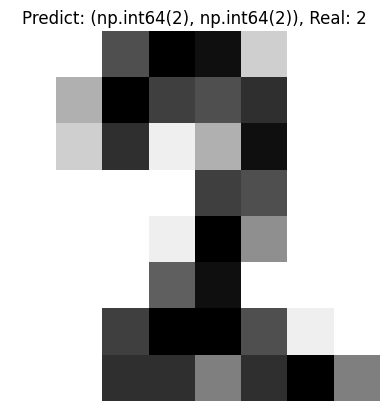

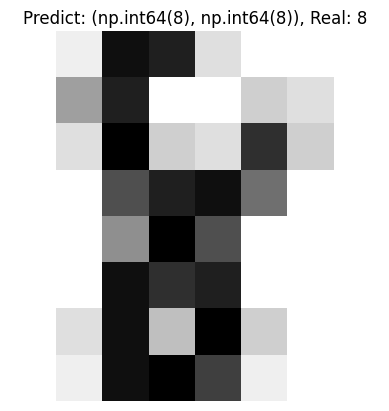

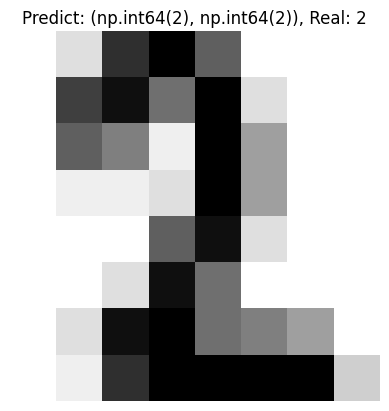

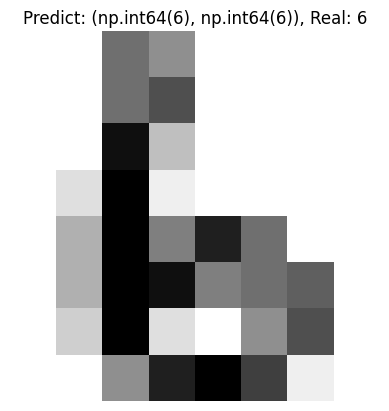

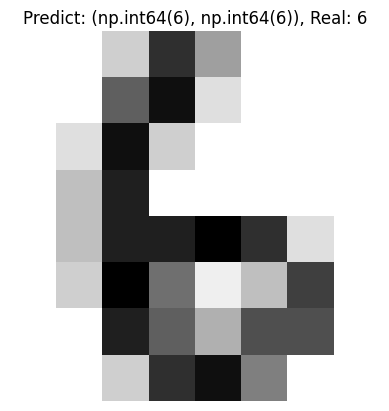

In [57]:
# 4. 可视化部分预测结果
for i in range(5):
    image = X_test[i].reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(f"Predict: {y_pred[i]}, Real: {y_test[i]}")
    plt.axis('off')
    plt.show()

实现加权算法

In [ ]:
from collections import defaultdict
def weighted_knn_predict(X_train, y_train, x_new, k):
    distances = []
    # 计算距离
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], x_new)
        distances.append((distance, y_train[i]))
    # 按距离排序
    distances.sort(key=lambda x: x[0])
    # 选取前 K 个最近邻
    k_neighbors = distances[:k]
    # 计算加权投票
    class_votes = defaultdict(float)
    for distance, label in k_neighbors:
        weight = 1 / (distance + 1e-5)  # 防止除以零
        class_votes[label] += weight
    # 选择得票数最高的类别
    predicted_label = max(class_votes, key=class_votes.get)
    return predicted_label